In [33]:
##############まずこれを回してマルチページTiffを分ける
#BL10のtiff画像は128✖️128のグレースケール画像が1ビーム(0.04s)4000枚連なって保存される形式になっている。
from PIL import Image, ImageSequence
import numpy as np
image = Image.open('./Desktop/practice3/GEM001030_00_000_000.tiff')
#for i in range(image.n_frames):
          #  image.seek(i)
           # rgb_image = image.convert('L')
           # rgb_image2 = image.convert('1')
            #rgb_images.append(rgb_image2)
#print(image.n_frames)
for i, page in enumerate(ImageSequence.Iterator(image)):#jpegにするためにrgb_imageなどに変換して保存はできなかった
    print(i)
    page.save("./Desktop/practice3/file2/GEM001030_{}.tif".format(i), format='tiff', quality=95)
print("end")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414


In [122]:
######5個までのtiffファイルをcsvにする#これは結局使ってない練習用
import csv
from PIL import Image
# 画像読込
i=0
while i<5:
    print(i)
    img = Image.open("./Desktop/practice3/file2/GEM001046_%d.tif" % i)
    width, height = img.size


    # 輝度値の取得、CSVファイルに保存
    # 画像の輝度値をlistで取得
    data = list(img.getdata())
    # 輝度値をCSVファイルで保存
    with open('./Desktop/practice3/file/GEM001046_%d.csv' % i, 'w', newline='') as csvfile:
        spamwriter  = csv.writer(csvfile)
        # 画像データを一行ごと書き込み
        x = 0
        y = 0
        for y in range(height):
            # 一行分のデータ
            line_data = data[x:x+width]
            # 一行分のデータを書き込み
            spamwriter.writerow(line_data)
            x += width
            #img.show()
    i +=1

0
1
2
3
4


In [161]:
######4000個のtiff画像の真ん中の四角部分(25mm/100mm→128ピクセル^2なので48~80ピクセル)を数えるだけ#下2つののプログラムはこれが元になっている
import csv
from PIL import Image
import numpy as np
startpixcel = 48
endpixcel = 80
deltapixcel = endpixcel - startpixcel
allpagenumber =4000 # ページ数
sum_i = np.array([])
# 画像読込

i=0
while i<allpagenumber:
    img = Image.open("./Desktop/practice3/file2/GEM001046_%d.tif" % i)
    width, height = img.size
    # 輝度値の取得、CSVファイルに保存
    # 画像の輝度値をlistで取得
    data = list(img.getdata())
    # 輝度値をCSVファイルで保存
    with open('./Desktop/practice3/file/GEM001046_%d.csv' % i, 'w', newline='') as csvfile:
        spamwriter  = csv.writer(csvfile)
        # 画像データを一行ごと書き込み
        x = startpixcel
        y = 0
        sumdata = 0
        for y in range(height):
            # 一行分のデータ（xの範囲指定）
            line_data = data[x:x+deltapixcel]        
            # yの範囲指定
            if startpixcel <= y <= endpixcel:    
                #csvの横のラインリストを全部足す
                sumdata += sum(line_data)
                #print(sumdata)
                # 一行分のデータを書き込み  : ここでEnter→spamwriter.writerow(line_data)
            x += width
    sum_i = np.append(a, sumdata)
    print(i,":",sumdata)
    sumdata= 0
    i +=1
#plot a

0 : 20204.0
1 : 16360.0
2 : 16286.0
3 : 15965.0
4 : 14785.0
5 : 12650.0
6 : 14046.0
7 : 13707.0
8 : 13278.0
9 : 13114.0
10 : 12419.0
11 : 11995.0
12 : 12147.0
13 : 11864.0
14 : 11582.0
15 : 11081.0
16 : 10825.0
17 : 10706.0
18 : 10619.0
19 : 10218.0
20 : 9889.0
21 : 9807.0
22 : 9727.0
23 : 9464.0
24 : 9516.0
25 : 9190.0
26 : 9039.0
27 : 8884.0
28 : 8696.0
29 : 8597.0
30 : 8559.0
31 : 8560.0
32 : 8400.0
33 : 8077.0
34 : 7918.0
35 : 8038.0
36 : 7825.0
37 : 7735.0
38 : 7567.0
39 : 7654.0
40 : 7383.0
41 : 7434.0
42 : 7300.0
43 : 7008.0
44 : 7088.0
45 : 6977.0
46 : 6901.0
47 : 6854.0
48 : 6838.0
49 : 6735.0
50 : 6552.0
51 : 6472.0
52 : 6423.0
53 : 6345.0
54 : 6380.0
55 : 6291.0
56 : 6277.0
57 : 6222.0
58 : 6105.0
59 : 6017.0
60 : 6118.0
61 : 6052.0
62 : 5909.0
63 : 5957.0
64 : 5915.0
65 : 5950.0
66 : 5796.0
67 : 5804.0
68 : 5794.0
69 : 5657.0
70 : 5613.0
71 : 5604.0
72 : 5772.0
73 : 5472.0
74 : 5514.0
75 : 5470.0
76 : 5380.0
77 : 5404.0
78 : 5330.0
79 : 5190.0
80 : 5141.0
81 : 5346.0
82 : 5

676 : 855.0
677 : 938.0
678 : 839.0
679 : 868.0
680 : 902.0
681 : 900.0
682 : 932.0
683 : 906.0
684 : 877.0
685 : 840.0
686 : 854.0
687 : 906.0
688 : 885.0
689 : 932.0
690 : 885.0
691 : 874.0
692 : 900.0
693 : 964.0
694 : 951.0
695 : 911.0
696 : 914.0
697 : 860.0
698 : 924.0
699 : 936.0
700 : 870.0
701 : 951.0
702 : 940.0
703 : 954.0
704 : 919.0
705 : 886.0
706 : 953.0
707 : 929.0
708 : 940.0
709 : 887.0
710 : 862.0
711 : 957.0
712 : 917.0
713 : 963.0
714 : 871.0
715 : 886.0
716 : 918.0
717 : 892.0
718 : 891.0
719 : 954.0
720 : 932.0
721 : 873.0
722 : 925.0
723 : 954.0
724 : 893.0
725 : 878.0
726 : 917.0
727 : 958.0
728 : 931.0
729 : 909.0
730 : 926.0
731 : 934.0
732 : 948.0
733 : 892.0
734 : 931.0
735 : 897.0
736 : 939.0
737 : 951.0
738 : 921.0
739 : 925.0
740 : 919.0
741 : 914.0
742 : 960.0
743 : 850.0
744 : 1000.0
745 : 912.0
746 : 966.0
747 : 968.0
748 : 958.0
749 : 1055.0
750 : 975.0
751 : 936.0
752 : 966.0
753 : 1010.0
754 : 1015.0
755 : 953.0
756 : 950.0
757 : 972.0
758 : 940.0


1354 : 302.0
1355 : 278.0
1356 : 297.0
1357 : 323.0
1358 : 286.0
1359 : 312.0
1360 : 356.0
1361 : 291.0
1362 : 340.0
1363 : 337.0
1364 : 297.0
1365 : 254.0
1366 : 291.0
1367 : 298.0
1368 : 297.0
1369 : 287.0
1370 : 276.0
1371 : 269.0
1372 : 264.0
1373 : 285.0
1374 : 294.0
1375 : 297.0
1376 : 255.0
1377 : 269.0
1378 : 288.0
1379 : 261.0
1380 : 289.0
1381 : 282.0
1382 : 293.0
1383 : 252.0
1384 : 294.0
1385 : 281.0
1386 : 254.0
1387 : 275.0
1388 : 245.0
1389 : 278.0
1390 : 287.0
1391 : 270.0
1392 : 239.0
1393 : 234.0
1394 : 268.0
1395 : 271.0
1396 : 248.0
1397 : 232.0
1398 : 262.0
1399 : 296.0
1400 : 275.0
1401 : 251.0
1402 : 275.0
1403 : 262.0
1404 : 262.0
1405 : 247.0
1406 : 250.0
1407 : 259.0
1408 : 252.0
1409 : 261.0
1410 : 272.0
1411 : 208.0
1412 : 249.0
1413 : 274.0
1414 : 256.0
1415 : 296.0
1416 : 245.0
1417 : 249.0
1418 : 247.0
1419 : 224.0
1420 : 248.0
1421 : 245.0
1422 : 232.0
1423 : 197.0
1424 : 250.0
1425 : 258.0
1426 : 223.0
1427 : 241.0
1428 : 234.0
1429 : 228.0
1430 : 240.0

2039 : 41.0
2040 : 45.0
2041 : 54.0
2042 : 23.0
2043 : 37.0
2044 : 36.0
2045 : 53.0
2046 : 35.0
2047 : 49.0
2048 : 31.0
2049 : 38.0
2050 : 38.0
2051 : 37.0
2052 : 42.0
2053 : 35.0
2054 : 42.0
2055 : 41.0
2056 : 33.0
2057 : 45.0
2058 : 43.0
2059 : 39.0
2060 : 40.0
2061 : 40.0
2062 : 36.0
2063 : 39.0
2064 : 33.0
2065 : 38.0
2066 : 35.0
2067 : 38.0
2068 : 42.0
2069 : 38.0
2070 : 26.0
2071 : 41.0
2072 : 36.0
2073 : 49.0
2074 : 29.0
2075 : 34.0
2076 : 34.0
2077 : 39.0
2078 : 34.0
2079 : 36.0
2080 : 36.0
2081 : 35.0
2082 : 34.0
2083 : 34.0
2084 : 30.0
2085 : 27.0
2086 : 37.0
2087 : 38.0
2088 : 41.0
2089 : 45.0
2090 : 32.0
2091 : 39.0
2092 : 33.0
2093 : 37.0
2094 : 30.0
2095 : 25.0
2096 : 28.0
2097 : 34.0
2098 : 27.0
2099 : 43.0
2100 : 27.0
2101 : 23.0
2102 : 36.0
2103 : 37.0
2104 : 35.0
2105 : 32.0
2106 : 33.0
2107 : 37.0
2108 : 30.0
2109 : 33.0
2110 : 32.0
2111 : 32.0
2112 : 25.0
2113 : 33.0
2114 : 22.0
2115 : 31.0
2116 : 28.0
2117 : 21.0
2118 : 27.0
2119 : 26.0
2120 : 35.0
2121 : 23.0
2122

2908 : 4.0
2909 : 3.0
2910 : 2.0
2911 : 6.0
2912 : 2.0
2913 : 4.0
2914 : 0.0
2915 : 4.0
2916 : 0.0
2917 : 2.0
2918 : 5.0
2919 : 4.0
2920 : 3.0
2921 : 2.0
2922 : 2.0
2923 : 2.0
2924 : 5.0
2925 : 3.0
2926 : 1.0
2927 : 4.0
2928 : 6.0
2929 : 3.0
2930 : 1.0
2931 : 3.0
2932 : 4.0
2933 : 1.0
2934 : 3.0
2935 : 5.0
2936 : 2.0
2937 : 1.0
2938 : 5.0
2939 : 4.0
2940 : 3.0
2941 : 4.0
2942 : 3.0
2943 : 3.0
2944 : 1.0
2945 : 1.0
2946 : 0.0
2947 : 0.0
2948 : 2.0
2949 : 3.0
2950 : 4.0
2951 : 4.0
2952 : 2.0
2953 : 3.0
2954 : 2.0
2955 : 0.0
2956 : 2.0
2957 : 3.0
2958 : 1.0
2959 : 2.0
2960 : 1.0
2961 : 4.0
2962 : 2.0
2963 : 1.0
2964 : 3.0
2965 : 2.0
2966 : 2.0
2967 : 0.0
2968 : 4.0
2969 : 3.0
2970 : 3.0
2971 : 2.0
2972 : 1.0
2973 : 0.0
2974 : 3.0
2975 : 6.0
2976 : 4.0
2977 : 3.0
2978 : 0.0
2979 : 4.0
2980 : 6.0
2981 : 5.0
2982 : 2.0
2983 : 2.0
2984 : 3.0
2985 : 3.0
2986 : 3.0
2987 : 1.0
2988 : 1.0
2989 : 2.0
2990 : 4.0
2991 : 0.0
2992 : 2.0
2993 : 1.0
2994 : 6.0
2995 : 4.0
2996 : 4.0
2997 : 1.0
2998 : 1.0

3800 : 0.0
3801 : 0.0
3802 : 0.0
3803 : 1.0
3804 : 0.0
3805 : 0.0
3806 : 1.0
3807 : 1.0
3808 : 0.0
3809 : 0.0
3810 : 0.0
3811 : 0.0
3812 : 0.0
3813 : 0.0
3814 : 0.0
3815 : 0.0
3816 : 0.0
3817 : 0.0
3818 : 1.0
3819 : 0.0
3820 : 1.0
3821 : 1.0
3822 : 1.0
3823 : 1.0
3824 : 0.0
3825 : 0.0
3826 : 0.0
3827 : 0.0
3828 : 0.0
3829 : 1.0
3830 : 0.0
3831 : 0.0
3832 : 0.0
3833 : 1.0
3834 : 0.0
3835 : 0.0
3836 : 0.0
3837 : 0.0
3838 : 1.0
3839 : 0.0
3840 : 0.0
3841 : 0.0
3842 : 0.0
3843 : 0.0
3844 : 1.0
3845 : 2.0
3846 : 1.0
3847 : 1.0
3848 : 0.0
3849 : 0.0
3850 : 0.0
3851 : 1.0
3852 : 0.0
3853 : 0.0
3854 : 0.0
3855 : 0.0
3856 : 1.0
3857 : 0.0
3858 : 0.0
3859 : 0.0
3860 : 0.0
3861 : 0.0
3862 : 0.0
3863 : 0.0
3864 : 0.0
3865 : 0.0
3866 : 0.0
3867 : 1.0
3868 : 0.0
3869 : 0.0
3870 : 0.0
3871 : 0.0
3872 : 0.0
3873 : 0.0
3874 : 0.0
3875 : 0.0
3876 : 0.0
3877 : 2.0
3878 : 0.0
3879 : 0.0
3880 : 0.0
3881 : 1.0
3882 : 0.0
3883 : 0.0
3884 : 0.0
3885 : 0.0
3886 : 0.0
3887 : 0.0
3888 : 0.0
3889 : 0.0
3890 : 0.0

file number 1032 / 1047

 atm_m→ 0.2263 
 beam_to_detector_m→ 14.85 

fit_範囲 200 ~ 1000 ×0.00001 s
fit式： cosh(p0*Const*x)+p1)/(1+p2)
Const=2.6867805 *10^25*29650e-28*396.5*0.00001=0.31586396083

 中性子の偏極率p0 0.7901042277968757 ± 0.01215196781042626

 p1: -0.06734811251344129 p2 -0.059756651343965836


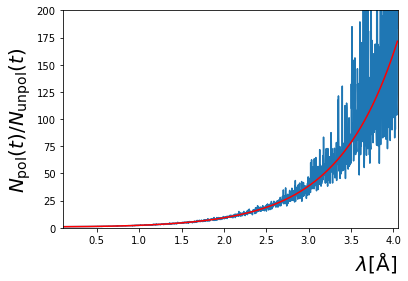

In [39]:
#上のプログラムを関数にしたい
#1番上のプログラムで分割したtiffファイルをよみこんで、3heの偏極率を出す
######4000個のtiff画像の真ん中の四角部分(25mm/100mm→128ピクセル^2なので48~80ピクセル)の輝度合計をフィッティングするプログラム
import csv
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

###########################定数ココ###############################
startpixcel = 48#取得するピクセル位置のスタート(これも含む)
endpixcel = 80#取得するピクセル位置のエンド
deltapixcel = endpixcel - startpixcel
allpagenumber =1520 # ページ数# 4000入れちゃうと0で割るところが出てきてfitできない
###########fit範囲指定＃＃＃＃＃＃＃＃＃
xmin = 200
xmax = 1000
#pressure_amg = 3.2#^3He密度[amg]
#cell_length_m = 0.06 #セルの長さ[m]
atm_m = 22.63 / 100
beam_to_detector_m = 14.85 #ビーム口から検出器の距離[m]

file_un_polarized = "1047"#偏極壊したあとのファイル番号
file_polarized = "1032"#偏極する前のファイル番号
##########################＃#定数ココ###############################
# 画像読込＃バラバラにしたTiffファイルを読み込む関数#ここで毎回時間食うのは勿体無いけど

def openfile_sum(a):    
    sum_i = np.array([])
    i=0
    while i<allpagenumber:
        img = Image.open("./Desktop/practice3/file2/GEM00"+a+"_%d.tif" % i)#ファイルの識別番号以外の部分を書く
        width, height = img.size
        # 輝度値の取得、CSVファイルに保存
        # 画像の輝度値をlistで取得
        data = list(img.getdata())
        x = startpixcel
        y = 0
        sumdata = 0
        for y in range(height):
            # 一行分のデータ（xの範囲指定）
            line_data = data[x:x+deltapixcel]        
            # yの範囲指定
            if startpixcel <= y <= endpixcel:    
                #csvの横のラインリストを全部足す
                sumdata += sum(line_data)
                #print(sumdata)            
            x += width
        sum_i = np.append(sum_i,sumdata)       
        #print(i,":",sumdata) #print(sum_i)
        sumdata= 0
        i +=1
    #print(sumdata)
    return sum_i



sum0 = openfile_sum(file_un_polarized)#偏極壊したあと？？
sum1 = openfile_sum(file_polarized)#偏極壊す前？？

print("file number",file_polarized,"/",file_un_polarized)
sum4=sum1/sum0
page = np.arange(0, allpagenumber, 1)#０~ページ数−１までの数列を作成
#sum4=sum1/(1.26000794e+04*np.exp(-1.08163741e-02*page)+3.17416058e+02)
wavelength = page*395.6*0.00001*10/beam_to_detector_m
########################## コメント ############################
#coshの中身は無次元(PHe*p[/m^3]d[m]σ[m^2])　　　
#1atm=101325/m^2
#p≒３amg,d=0.06m,1 amg = 2.6867805 × 10^25[m-3]より、pd[/m^2]=3*0.06*2.6867805 *10^25=4.8362049e+24[/m^2]
#次に断面積の計算:1秒に25回来ているので1回0.04s：これを4000枚に分けているので、１枚の画像につき0.00001s 　x枚目で0.0000xs 
#ビーム口から検出器までの距離は16mなので、速さv=16/0.00001x [m/s] 　　　
#1b=e−28 [m^2]、断面積は中性子波長に比例σ[b]=29650＊波長λ[nm]より、σ[m^2]=29650＊波長λ[nm]*10^-28
#λ[nm]=395.6/v[/(m/s)]これを画像の番号xに直すと上記より、λ[nm]=395.6*0.00001/16*x
#全てを代入すると、PHe*p[/m^3]d[m]σ[m^2]=PHe*(4.8362*10^2４*29650)*(395.6*0.00001/16x)*10^-28
#coshの中身は、（p*3*0.06*2.6867805 *10^25*29650e-28*396.5*0.00001/16*x）→ρHe*p*d*Const*/x
#Const=2.6867805 *10^25*29650e-28*396.5*0.00001=0.31586396083
##########################　コメント　#########################＃＃＃＃

#Const = (pressure_amg*cell_length_m*0.31586396083)/beam_to_detector_m
Const = (atm_m*0.31586396083)/beam_to_detector_m

def y(x,p0,p1,p2):#fit式を定義
    return (np.cosh(p0*Const*x)+p1)/(1+p2)

# 指定した範囲内のデータのインデックスを取得#######################
idx = np.logical_and(page >= xmin, page <= xmax)
#######フィッティング＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
#popt, pcov = curve_fit(y,page,sum0,0.0003)#最後のは初期値
# 指定した範囲内のデータのみを使用してフィット
popt, pcov = curve_fit(y,page[idx],sum4[idx])#最後のは初期値
#print(popt)
#print("\n","pressure_amg→",pressure_amg,"\n","cell_length_m→",cell_length_m,"\n","beam_to_detector_m→",beam_to_detector_m,"\n")
print("\n","atm_m→",atm_m,"\n","beam_to_detector_m→",beam_to_detector_m,"\n")
print("fit_範囲",xmin,"~",xmax,"×0.00001","s")
print("fit式：","cosh(p0*Const*x)+p1)/(1+p2)")
print("Const=2.6867805 *10^25*29650e-28*396.5*0.00001=0.31586396083")
perr = np.sqrt(np.diag(pcov))
print("\n","中性子の偏極率p0",popt[0],"±",perr[0])
print("\n","p1:",popt[1],"p2",popt[2])

#######プロット：生データ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
fig, ax = plt.subplots()
plt.plot(wavelength,sum4)
#ax.set_xlim(0, allpagenumber)

ax.set_xlim(0.1, allpagenumber*395.6*0.00001*10/beam_to_detector_m)

ax.set_ylim(0, 200)
plt.xlabel("$λ[\mathrm{Å}]$",fontsize=20,loc="right")
plt.ylabel("$N _{\mathrm {pol}}(t)/N_{\mathrm {unpol}}(t)$",fontsize=20)
#######プロット：フィット結果＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃

plt.plot(wavelength, y(page,popt[0] ,popt[1] ,popt[2]), 'r-', label = 'fitting curve')
plt.show()



file number 1032 / 1047

 atm_m→ 0.2263 
 beam_to_detector_m→ 14.85 

fit_範囲 200 ~ 1000 ×0.00001 s
fit式： cosh(p0*Const*x)+p1)/(1+p2)
Const=2.6867805 *10^25*29650e-28*396.5*0.00001=0.31586396083

 中性子の偏極率p0 0.7901042277968757 ± 0.01215196781042626

 p1: -0.06734811251344129 p2 -0.059756651343965836


/var/folders/ch/2_yb3tss02zdnq1dk_r8q7l80000gn/T/ipykernel_12898/2156354914.py:105: RuntimeWarning: invalid value encountered in sqrt
  mtan = np.abs(np.sqrt(1-((1/sum5)*(1/sum5))))


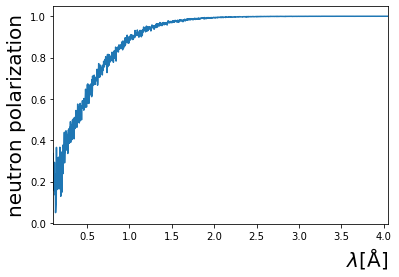

In [37]:
#横軸を波長に直したい＃中性子の偏極率を出したい
#１番上で切り分けたファイルをよみこんで中性子の偏極率をプロットする。
#これほんとは上のプログラムと混ぜたい
import csv
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

###########################定数ココ###############################
startpixcel = 48#取得するピクセル位置のスタート(これも含む)
endpixcel = 80#取得するピクセル位置のエンド
deltapixcel = endpixcel - startpixcel
allpagenumber =1520 # ページ数# 4000入れちゃうと0で割るところが出てきてfitできない
###########fit範囲指定＃＃＃＃＃＃＃＃＃
xmin = 200
xmax = 1000
#pressure_amg = 3.2#^3He密度[amg]
#cell_length_m = 0.06 #セルの長さ[m]
atm_m = 22.63 / 100
beam_to_detector_m = 14.85 #ビーム口から検出器の距離[m]

file_un_polarized = "1047"#偏極壊したあとのファイル番号
file_polarized = "1032"#偏極する前のファイル番号
##########################＃#定数ココ###############################
# 画像読込＃バラバラにしたTiffファイルを読み込む関数#ここで毎回時間食うのは勿体無いけど

def openfile_sum(a):    
    sum_i = np.array([])
    i=0
    while i<allpagenumber:
        img = Image.open("./Desktop/practice3/file2/GEM00"+a+"_%d.tif" % i)#ファイルの識別番号以外の部分を書く
        width, height = img.size
        # 輝度値の取得、CSVファイルに保存
        # 画像の輝度値をlistで取得
        data = list(img.getdata())
        x = startpixcel
        y = 0
        sumdata = 0
        for y in range(height):
            # 一行分のデータ（xの範囲指定）
            line_data = data[x:x+deltapixcel]        
            # yの範囲指定
            if startpixcel <= y <= endpixcel:    
                #csvの横のラインリストを全部足す
                sumdata += sum(line_data)
                #print(sumdata)            
            x += width
        sum_i = np.append(sum_i,sumdata)       
        #print(i,":",sumdata) #print(sum_i)
        sumdata= 0
        i +=1
    #print(sumdata)
    return sum_i



sum0 = openfile_sum(file_un_polarized)#偏極壊したあと？？
sum1 = openfile_sum(file_polarized)#偏極壊す前？？

print("file number",file_polarized,"/",file_un_polarized)
sum4=sum1/sum0
page = np.arange(0, allpagenumber, 1)#０~ページ数−１までの数列を作成
#sum4=sum1/(1.26000794e+04*np.exp(-1.08163741e-02*page)+3.17416058e+02)
wavelength = page*395.6*0.00001*10/beam_to_detector_m
########################## コメント ############################
#coshの中身は無次元(PHe*p[/m^3]d[m]σ[m^2])　　　
#1atm=101325/m^2
#p≒３amg,d=0.06m,1 amg = 2.6867805 × 10^25[m-3]より、pd[/m^2]=3*0.06*2.6867805 *10^25=4.8362049e+24[/m^2]
#次に断面積の計算:1秒に25回来ているので1回0.04s：これを4000枚に分けているので、１枚の画像につき0.00001s 　x枚目で0.0000xs 
#ビーム口から検出器までの距離は16mなので、速さv=16/0.00001x [m/s] 　　　
#1b=e−28 [m^2]、断面積は中性子波長に比例σ[b]=29650＊波長λ[nm]より、σ[m^2]=29650＊波長λ[nm]*10^-28
#λ[nm]=395.6/v[/(m/s)]これを画像の番号xに直すと上記より、λ[nm]=395.6*0.00001*x/16
#全てを代入すると、PHe*p[/m^3]d[m]σ[m^2]=PHe*(4.8362*10^2４*29650)*(395.6*0.00001/16x)*10^-28
#coshの中身は、（p*3*0.06*2.6867805 *10^25*29650e-28*396.5*0.00001/16*x）→ρHe*p*d*Const*/x
#Const=2.6867805 *10^25*29650e-28*396.5*0.00001=0.31586396083
##########################　コメント　#########################＃＃＃＃

#Const = (pressure_amg*cell_length_m*0.31586396083)/beam_to_detector_m
Const = (atm_m*0.31586396083)/beam_to_detector_m

def y(x,p0,p1,p2):#fit式を定義
    return (np.cosh(p0*Const*x)+p1)/(1+p2)

# 指定した範囲内のデータのインデックスを取得#######################
idx = np.logical_and(page >= xmin, page <= xmax)
#######フィッティング＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
#popt, pcov = curve_fit(y,page,sum0,0.0003)#最後のは初期値
# 指定した範囲内のデータのみを使用してフィット
popt, pcov = curve_fit(y,page[idx],sum4[idx])#最後のは初期値
#print(popt)
#print("\n","pressure_amg→",pressure_amg,"\n","cell_length_m→",cell_length_m,"\n","beam_to_detector_m→",beam_to_detector_m,"\n")
print("\n","atm_m→",atm_m,"\n","beam_to_detector_m→",beam_to_detector_m,"\n")
print("fit_範囲",xmin,"~",xmax,"×0.00001","s")
print("fit式：","cosh(p0*Const*x)+p1)/(1+p2)")
print("Const=2.6867805 *10^25*29650e-28*396.5*0.00001=0.31586396083")
perr = np.sqrt(np.diag(pcov))
print("\n","中性子の偏極率p0",popt[0],"±",perr[0])
print("\n","p1:",popt[1],"p2",popt[2])

#######プロット：生データ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
fig, ax = plt.subplots()

#plt.plot(wavelength,sum4)
sum5 = (sum4*(1+popt[2]))-popt[1]
mtan = np.abs(np.sqrt(1-((1/sum5)*(1/sum5))))
plt.plot(wavelength,mtan)
ax.set_xlim(0.1, allpagenumber*395.6*0.00001*10/beam_to_detector_m)
#ax.set_ylim(0, 200)
plt.xlabel("$λ[\mathrm{Å}]$",fontsize=20,loc="right")
#plt.ylabel("$N _{\mathrm {pol}}(t)/N_{\mathrm {unpol}}(t)$",fontsize=20)
plt.ylabel("neutron polarization",fontsize=20)
#######プロット：フィット結果＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃

#plt.plot(wavelength, y(page,popt[0] ,popt[1] ,popt[2]), 'r-', label = 'fitting curve')
plt.show()


file number 1047 / 1047
[ 1.19572398e+04 -1.03749114e+02  3.84327017e-01 -7.22427927e-04
  7.16003623e-07 -3.55738681e-10  6.97022543e-14]

 atm_m→ 0.2263 
 beam_to_detector_m→ 15.85 

fit_time_scale 0.015200000000000002

 中性子の偏極率↓


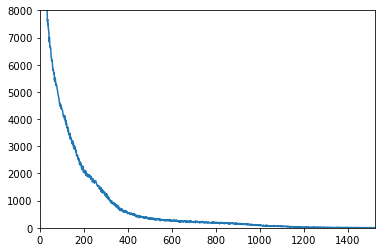

In [12]:
import numpy as np# これはパイソンのベクトルとアレイの使い方を学習している#つかってない
a=5
def vectorreturn(filename):
    sum_i = np.array([1,2,3])
    sum_i = np.append(sum_i, filename)
    return sum_i
value = vectorreturn(a) 
print(value) # 5

[1 2 3 5]


In [118]:
# これほんとは回したい？
import csv
from PIL import Image

# 画像読込
img = Image.open("./Desktop/practice3/file2/GEM001046_2.tif")


width, height = img.size

########################################################
# 輝度値の取得、CSVファイルに保存

# 画像の輝度値をlistで取得
data = list(img.getdata())

# 輝度値をCSVファイルで保存
with open('./Desktop/practice3/file/GEM001046_2.csv', 'w', newline='') as csvfile:
    spamwriter  = csv.writer(csvfile)

    # 画像データを一行ごと書き込み
    x = 0
    for y in range(height):
        # 一行分のデータ
        line_data = data[x:x+width]
        # 一行分のデータを書き込み
        spamwriter.writerow(line_data)
        x += width

#img.show()